# *Graph of adjacent states based on county adjacency data*

### Download dataset and show beginning

In [174]:
import requests
data = requests.get("https://www2.census.gov/geo/docs/reference/county_adjacency.txt").text
lines = data.splitlines()

In [175]:
def head(str, n=10):
    return "\n".join(str.splitlines()[:n])
print(head(data))

"Autauga County, AL"	01001	"Autauga County, AL"	01001
		"Chilton County, AL"	01021
		"Dallas County, AL"	01047
		"Elmore County, AL"	01051
		"Lowndes County, AL"	01085
		"Montgomery County, AL"	01101
"Baldwin County, AL"	01003	"Baldwin County, AL"	01003
		"Clarke County, AL"	01025
		"Escambia County, AL"	01053
		"Mobile County, AL"	01097


### Parse the dataset into a dictionary

In [176]:
counties = {}

for i, line in enumerate(lines):
    # if doesn't start with tab
    if not line.startswith("\t"):
        county_name = line.split("\t")[0].strip("\"")
        counties[county_name] = []
        x = i + 1
        
        while x < len(lines) and lines[x].startswith("\t"):
            counties[county_name].append(lines[x].strip().split("\t")[0].strip("\""))
            x += 1

# Pretty-print output
import json
print(head(json.dumps(counties, indent=2)))

{
  "Autauga County, AL": [
    "Chilton County, AL",
    "Dallas County, AL",
    "Elmore County, AL",
    "Lowndes County, AL",
    "Montgomery County, AL"
  ],
  "Baldwin County, AL": [
    "Clarke County, AL",


### Change the dictionary to show which states each county borders

In [177]:
def get_state(county_string):
    """ Get state abbreviation from string like 'Autauga County, AL' """
    return county_string.split(",")[1].strip()

for county in counties:
    # The conditional is because 9629 randomly has a number before the county name
    counties[county] = [get_state(c) for c in counties[county] if "," in c]

print(head(json.dumps(counties, indent=2)))

{
  "Autauga County, AL": [
    "AL",
    "AL",
    "AL",
    "AL",
    "AL"
  ],
  "Baldwin County, AL": [
    "AL",


### Eliminate connections to same state

In [178]:
for county in counties:
    counties[county] = [c for c in counties[county] if c != get_state(county)]

print(head(json.dumps(counties, indent=2)))

{
  "Autauga County, AL": [],
  "Baldwin County, AL": [
    "FL"
  ],
  "Barbour County, AL": [
    "GA",
    "GA",
    "GA"
  ],


### Compile connections by state

In [179]:
states = {}
for county in counties:
    state = get_state(county)
    # Each state gets a set of connections
    if state not in states:
        states[state] = set()
    states[state] = states[state].union(set(counties[county]))

# Convert sets back to lists
for state in states:
    states[state] = list(states[state])

from pprint import pprint
pprint(states)

{'AK': [],
 'AL': ['TN', 'GA', 'MS', 'FL'],
 'AR': ['MS', 'LA', 'MO', 'TN', 'TX', 'OK'],
 'AS': [],
 'AZ': ['UT', 'NV', 'CO', 'CA', 'NM'],
 'CA': ['AZ', 'NV', 'OR'],
 'CO': ['UT', 'NE', 'NM', 'KS', 'WY', 'OK'],
 'CT': ['MA', 'NY', 'RI'],
 'DC': ['VA', 'MD'],
 'DE': ['PA', 'MD', 'NJ'],
 'FL': ['GA', 'AL'],
 'GA': ['NC', 'SC', 'TN', 'AL', 'FL'],
 'GU': [],
 'HI': [],
 'IA': ['MN', 'NE', 'SD', 'WI', 'MO', 'IL'],
 'ID': ['UT', 'NV', 'WA', 'MT', 'WY', 'OR'],
 'IL': ['KY', 'MI', 'IN', 'IA', 'WI', 'MO'],
 'IN': ['MI', 'KY', 'IL', 'OH'],
 'KS': ['NE', 'CO', 'OK', 'MO'],
 'KY': ['OH', 'TN', 'IN', 'WV', 'VA', 'MO', 'IL'],
 'LA': ['TX', 'MS', 'AR'],
 'MA': ['CT', 'VT', 'NY', 'NH', 'RI'],
 'MD': ['DE', 'WV', 'PA', 'VA'],
 'ME': ['NH'],
 'MI': ['MN', 'OH', 'IN', 'WI', 'IL'],
 'MN': ['ND', 'SD', 'MI', 'IA', 'WI'],
 'MO': ['KY', 'OK', 'IL', 'NE', 'TN', 'IA', 'AR', 'KS'],
 'MP': [],
 'MS': ['TN', 'AR', 'LA', 'AL'],
 'MT': ['ND', 'ID', 'WY', 'SD'],
 'NC': ['GA', 'SC', 'TN', 'VA'],
 'ND': ['MN', 'MT', '

### Color graph

In [186]:
colors = ["red", "green", "blue", "yellow"]

# Sort states by most connections
state_names = list(states.keys())
state_names.sort(
    key = lambda x: len(states[x]),
    reverse=True,
)

state_colors = {state: None for state in state_names}

def is_available(color, state):
    for neighbor in states[state]:
        if state_colors[neighbor] == color:
            return false
    return true

def get_available_color(state):
    while not is_available(colors[i])

['MO', 'TN', 'KY', 'AR', 'CO', 'ID', 'IL', 'IA', 'NE', 'NY', 'SD', 'UT', 'WY', 'AZ', 'GA', 'MA', 'MI', 'MN', 'NM', 'OH', 'OK', 'PA', 'VA', 'WV', 'AL', 'IN', 'KS', 'MD', 'MS', 'MT', 'NV', 'NC', 'OR', 'TX', 'WI', 'CA', 'CT', 'DE', 'LA', 'NH', 'NJ', 'ND', 'RI', 'VT', 'DC', 'FL', 'SC', 'WA', 'ME', 'AK', 'HI', 'PR', 'AS', 'GU', 'MP', 'VI']
{'MO': None, 'TN': None, 'KY': None, 'AR': None, 'CO': None, 'ID': None, 'IL': None, 'IA': None, 'NE': None, 'NY': None, 'SD': None, 'UT': None, 'WY': None, 'AZ': None, 'GA': None, 'MA': None, 'MI': None, 'MN': None, 'NM': None, 'OH': None, 'OK': None, 'PA': None, 'VA': None, 'WV': None, 'AL': None, 'IN': None, 'KS': None, 'MD': None, 'MS': None, 'MT': None, 'NV': None, 'NC': None, 'OR': None, 'TX': None, 'WI': None, 'CA': None, 'CT': None, 'DE': None, 'LA': None, 'NH': None, 'NJ': None, 'ND': None, 'RI': None, 'VT': None, 'DC': None, 'FL': None, 'SC': None, 'WA': None, 'ME': None, 'AK': None, 'HI': None, 'PR': None, 'AS': None, 'GU': None, 'MP': None, 'V

### Build `.dot` file

In [181]:
file_lines = ["graph {", "  CA [color=red];"]
for state in states:
    if len(states[state]) == 0:
        file_lines.append(f"  {state};")
    for connection in states[state]:
        if f"  {connection} -- {state};" not in file_lines: # No duplicates connections running opposite directions
            file_lines.append(f"  {state} -- {connection};")
file_lines.append("}")

with open("out.dot", "w") as f:
    f.write("\n".join(file_lines))

print(head("\n".join(file_lines)))

graph {
  CA [color=red];
  AL -- TN;
  AL -- GA;
  AL -- MS;
  AL -- FL;
  AK;
  AZ -- UT;
  AZ -- NV;
  AZ -- CO;


### Convert `.dot` to PNG

In [182]:
!fdp out.dot -Tpng -o out.png

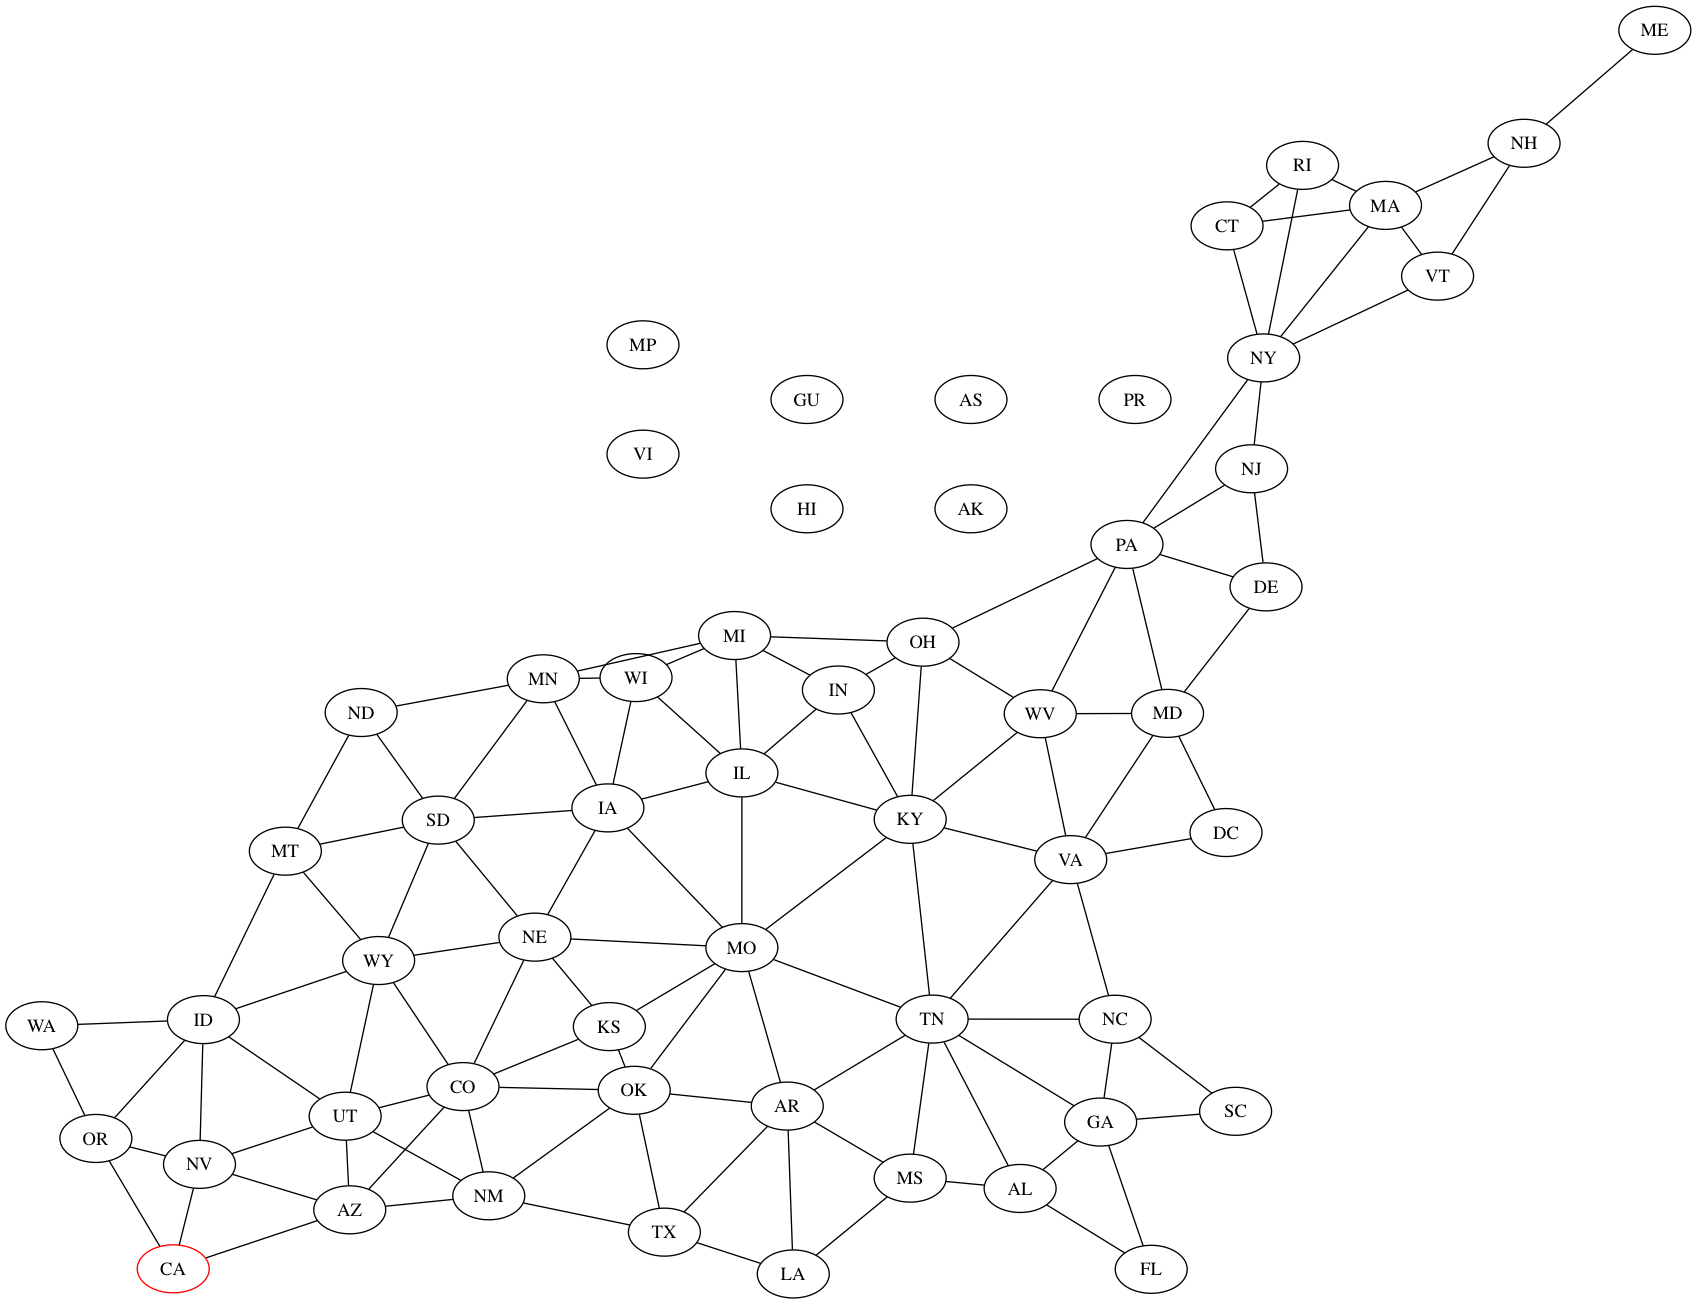

In [183]:
from IPython.display import Image
Image("out.png")